In [1]:
import nltk
nltk.download('vader_lexicon')  # For sentiment analysis
nltk.download('punkt')         # For tokenization
nltk.download('stopwords')     # For stopword removal


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/khadijab/nltk_data...
[nltk_data] Downloading package punkt to /home/khadijab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khadijab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv('/home/khadijab/Downloads/Womens Clothing E-Commerce Reviews.csv')
print(df.head())

# Test NLTK VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores("This product is amazing!"))

# Test spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp("This is a test sentence.")
print([(token.text, token.lemma_) for token in doc])

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [6]:
import pandas as pd
df = pd.read_csv('/home/khadijab/Downloads/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/home/khadijab/Downloads/Womens Clothing E-Commerce Reviews.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080 

In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define preprocessing function
def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    # Convert to lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize using spaCy
    doc = nlp(' '.join(tokens))
    lemmatized = [token.lemma_ for token in doc]
    return ' '.join(lemmatized)

# Apply preprocessing to Review Text
df['Cleaned_Text'] = df['Review Text'].apply(preprocess_text)

# Drop rows where Cleaned_Text is empty
df = df[df['Cleaned_Text'] != '']

# Create sentiment labels based on Rating (1-5 stars)
df['Sentiment_Label'] = df['Rating'].apply(
    lambda x: 'Positive' if x >= 4 else ('Neutral' if x == 3 else 'Negative')
)

# Display sample of cleaned data
print(df[['Review Text', 'Cleaned_Text', 'Sentiment_Label']].head())

                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                        Cleaned_Text Sentiment_Label  
0        absolutely wonderful silky sexy comfortable        Positive  
1  love dress sooo pretty happen find store I m g...        Positive  
2  high hope dress really want work initially ord...         Neutral  
3  love love love jumpsuit fun flirty fabulous ev...        Positive  
4  shirt flatter due adjustable front tie perfect...        Positive  


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER to get sentiment scores
df['VADER_Score'] = df['Cleaned_Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify VADER scores into sentiment labels
df['VADER_Sentiment'] = df['VADER_Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Compare VADER with ground-truth labels
print(df[['Cleaned_Text', 'Sentiment_Label', 'VADER_Sentiment']].head())

# Evaluate accuracy
accuracy = (df['Sentiment_Label'] == df['VADER_Sentiment']).mean()
print(f"Accuracy of VADER vs. Rating-based labels: {accuracy:.2f}")

                                        Cleaned_Text Sentiment_Label  \
0        absolutely wonderful silky sexy comfortable        Positive   
1  love dress sooo pretty happen find store I m g...        Positive   
2  high hope dress really want work initially ord...         Neutral   
3  love love love jumpsuit fun flirty fabulous ev...        Positive   
4  shirt flatter due adjustable front tie perfect...        Positive   

  VADER_Sentiment  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  
Accuracy of VADER vs. Rating-based labels: 0.77


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50, ngram_range=(1, 2))  # Unigrams and bigrams

# Fit and transform the cleaned text
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Text'])

# Get feature names (top words/phrases)
feature_names = tfidf.get_feature_names_out()

# Display top 10 terms
print("Top 10 TF-IDF terms:", feature_names[:10])

# Optionally, group by sentiment to see top terms per sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[df['VADER_Sentiment'] == sentiment]
    tfidf_matrix_subset = tfidf.fit_transform(subset['Cleaned_Text'])
    feature_names_subset = tfidf.get_feature_names_out()
    print(f"\nTop 5 terms for {sentiment}:", feature_names_subset[:5])

Top 10 TF-IDF terms: ['also' 'back' 'beautiful' 'bit' 'buy' 'color' 'comfortable' 'cute' 'do'
 'do not']

Top 5 terms for Positive: ['also' 'back' 'beautiful' 'bit' 'buy']

Top 5 terms for Negative: ['also' 'back' 'bad' 'be' 'be not']

Top 5 terms for Neutral: ['also' 'arm' 'back' 'big' 'buy']


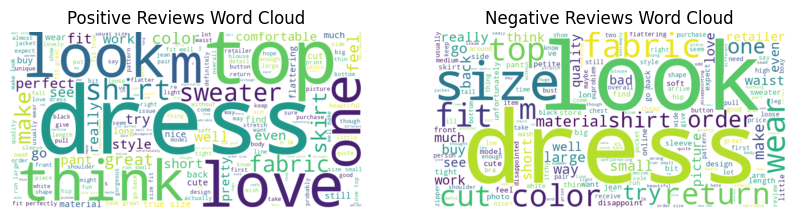

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative reviews
positive_text = ' '.join(df[df['VADER_Sentiment'] == 'Positive']['Cleaned_Text'])
negative_text = ' '.join(df[df['VADER_Sentiment'] == 'Negative']['Cleaned_Text'])

# Positive word cloud
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and labels
X = tfidf.fit_transform(df['Cleaned_Text'])
y = df['Sentiment_Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("ML Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ML Model Accuracy: 0.7719143298741444
              precision    recall  f1-score   support

    Negative       0.38      0.17      0.23       457
     Neutral       0.29      0.02      0.04       588
    Positive       0.79      0.98      0.88      3484

    accuracy                           0.77      4529
   macro avg       0.49      0.39      0.38      4529
weighted avg       0.69      0.77      0.70      4529



VADER_Sentiment  Negative  Neutral  Positive
Department Name                             
Bottoms               117       39      3506
Dresses               192       68      5885
Intimate               57       27      1569
Jackets                25       14       963
Tops                  312      110      9626
Trend                   8        2       108


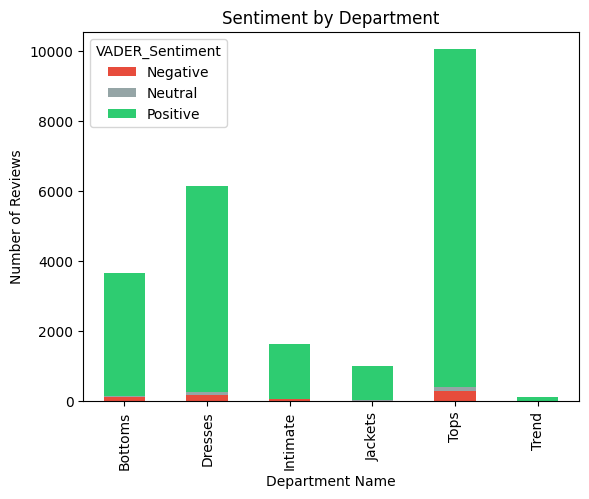

In [17]:
# Sentiment by Department
dept_sentiment = df.groupby(['Department Name', 'VADER_Sentiment']).size().unstack(fill_value=0)
print(dept_sentiment)

# Plot sentiment by department
dept_sentiment.plot(kind='bar', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'])
plt.title('Sentiment by Department')
plt.ylabel('Number of Reviews')
plt.show()

In [18]:
# Save processed dataset
df.to_csv('processed_reviews.csv', index=False)

# Save visualizations (already shown above, but can save explicitly)
plt.savefig('sentiment_distribution.png')

<Figure size 640x480 with 0 Axes>